# Eigenfaces

The goal of this example is to show how PCA can be used to produc so-called "Eigenfaces".

In [1]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/marcel/scikit_learn_data


(400, 4096)

Let’s visualize these faces to see what we’re working with

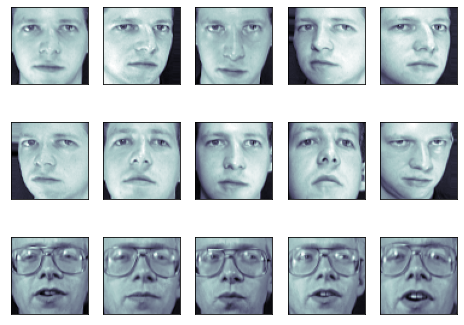

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

## PCA

1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [4]:

from sklearn.model_selection import train_test_split
from sklearn import decomposition

X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)


(300, 4096) (100, 4096)


PCA(n_components=150, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

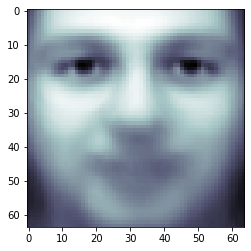

In [5]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

The principal components measure deviations about this mean along orthogonal axes

In [6]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

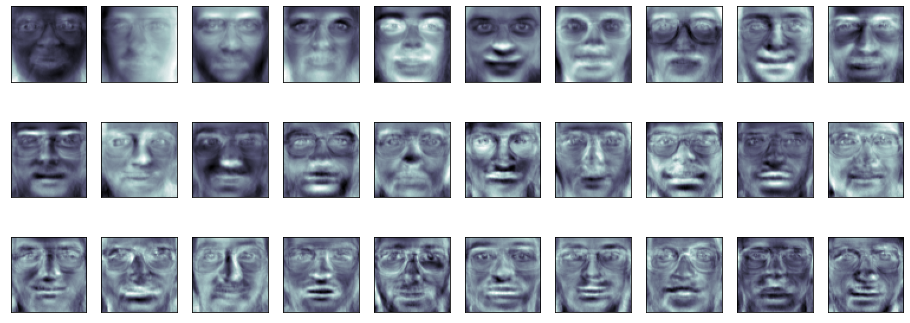

In [7]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [8]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.